In [24]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['StudentsPerformance.csv']


In [3]:
df=pd.read_csv('../input/StudentsPerformance.csv')

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [10]:
df.rename(columns={'race/ethnicity':'ethnicity','parental level of education':'parents','test preparation course':'prep','math score':'math','reading score':'reading','writing score':'writing'},inplace=True)
df.head()

,gender,ethnicity,parents,lunch,prep,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
df['total']=round((df.math+df.reading+df.writing)/3,2)
df.head()

,gender,ethnicity,parents,lunch,prep,math,reading,writing,total
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67
1,female,group C,some college,standard,completed,69,90,88,82.33
2,female,group B,master's degree,standard,none,90,95,93,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33
4,male,group C,some college,standard,none,76,78,75,76.33


In [12]:
df.isnull().sum()

gender       0
ethnicity    0
parents      0
lunch        0
prep         0
math         0
reading      0
writing      0
total        0
dtype: int64

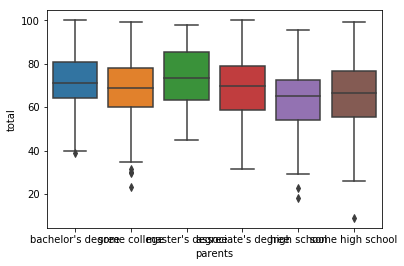

In [17]:
sns.boxplot(data=df,x='parents',y='total')

plt.show()

In [27]:
df['parents'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parents, dtype: int64

In [34]:
grouped_parents=df[['parents','total']].groupby(['parents'])
grouped_parents.head()

,parents,total
0,bachelor's degree,72.67
1,some college,82.33
2,master's degree,92.67
3,associate's degree,49.33
4,some college,76.33
5,associate's degree,77.33
6,some college,91.67
7,some college,40.67
8,high school,65.00
9,high school,49.33


In [41]:
F,p=stats.f_oneway(grouped_parents.get_group('high school')['total'],grouped_parents.get_group('bachelor\'s degree')['total'])
print(F,p)

30.68280359606852 6.461731629669535e-08
